In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/var/folders/0p/k705g0x102v0x_kgxydj12kc0000gn/T/ipykernel_2120/82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
import glob
import pandas as pd
import natsort
from datetime import datetime, timedelta

In [3]:
col_list = ['YMD', '3시간기온', '12시간강수량', '12시간신적설', '강수형태', '강수확률', '습도', '일최고기온', '일최저기온', '파고', '풍속', '풍향', '하늘상태']

In [4]:
def date_range(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    dates = [(start + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end-start).days+1)]
    return dates

In [6]:
# 2012년 
folder_2012 = os.listdir(f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_데이터/2014')
folder_2012 = natsort.natsorted(folder_2012)

for area in folder_2012:
    print(area)
    file_list = os.listdir(f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_데이터/2014/{area}')
    file_list = natsort.natsorted(file_list)

    # 빈 일별 데이터 프레임 생성
    dates = pd.DataFrame(columns=col_list)
    dates['YMD'] = date_range('2014-01-01', '2014-12-31')
    
    data = pd.DataFrame()
    
    counts = 1
    for file in file_list:
        print(file)
        if "파고" in file:
            counts += 1
            continue
        else:
            file = pd.read_csv(f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_데이터/2014/{area}/{file}', encoding='euc-kr')
        file.drop(index=file[file.iloc[:, 0] == ' '].index, inplace=True)
        file.reset_index(drop=True, inplace=True)
        
        # 일자 추가
        days = file.iloc[:, 0].str.replace(' ', '')                

        month_index = file[file.iloc[:, 0].str.contains('Star')].index
        month = 1
        i = 0
        
        for n in range(len(file.iloc[:, 0])):
            if days[n].find('Start') != -1:
                month = file.iloc[month_index[i], 0].replace(' Start : ', '')[4:6]
                i += 1
            if days[n] == ' ':
                file.drop(index=n, inplace=True)
            file.loc[n, 'YMD'] = f'2014-{month}-{days[n]}'
        
        # 'Start%' drop
        start_index = file[file.iloc[:, 0].str.contains('Start')].index
        file.drop(index=start_index, inplace=True)
        
        # object -> numeric
        for x in range(len(file.columns)-1):
            file.iloc[:, x] = pd.to_numeric(file.iloc[:, x])

        # 일단위 예측 범위 설정
        file = file[file['hour'] == 200]
        file = file[file['forecast'] <= 22]
        file.reset_index(drop=True, inplace=True)
        
        # datetime type으로 변환 - > str
        file['YMD'] = pd.to_datetime(file['YMD'])
        file['YMD'] = file['YMD'].astype(str)
        
        
        # 일별 평균
        mean_value = file.groupby(['YMD'], as_index=False).mean()
        
        
        for indexs in range(len(mean_value['YMD'])):
            target_index = dates[mean_value.loc[indexs, 'YMD'] == dates['YMD']].index
            try:
                dates.iloc[target_index, counts] = mean_value.iloc[indexs, 4]
            except:
                continue
        counts += 1
        
        if counts == 13:
            data = pd.concat([data, dates], ignore_index=False)
            print(data)
            counts = 1

    data['area'] = area
    data.to_csv(path_or_buf=f'/Users/simcheol-u/Desktop/빅_데이터_콘테스트/data/예보_모음/2014_{area}.csv')

강원
갈말읍_3시간기온_201401_201412.csv
갈말읍_6시간강수량_201401_201412.csv
갈말읍_6시간적설_201401_201412.csv
갈말읍_강수형태_201401_201412.csv
갈말읍_강수확률_201401_201412.csv
갈말읍_습도_201401_201412.csv
갈말읍_일최고기온_201401_201412.csv
갈말읍_일최저기온_201401_201412.csv
갈말읍_파고_201401_201412.csv
갈말읍_풍속_201401_201412.csv
갈말읍_풍향_201401_201412.csv
갈말읍_하늘상태_201401_201412.csv
            YMD     3시간기온 12시간강수량 12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01 -2.285714     0.0     0.0       0.0   8.571429       60.0   
1    2014-01-02 -2.142857     0.0     0.0       0.0  12.857143  67.142857   
2    2014-01-03 -2.428571     0.0     0.0       0.0  14.285714  79.285714   
3    2014-01-04 -2.285714     0.0     0.0       0.0       20.0  73.571429   
4    2014-01-05      -3.0     0.0     0.0       0.0   5.714286  73.571429   
..          ...       ...     ...     ...       ...        ...        ...   
360  2014-12-27 -4.714286     0.0     0.0       0.0  14.285714  76.428571   
361  2014-12-28 -2.714286     0.0     0.0      

송정동_하늘상태_201401_201412.csv
            YMD     3시간기온 12시간강수량 12시간신적설 강수형태       강수확률         습도  \
0    2014-01-01 -2.285714     0.0     0.0  0.0   8.571429       60.0   
1    2014-01-02 -2.142857     0.0     0.0  0.0  12.857143  67.142857   
2    2014-01-03 -2.428571     0.0     0.0  0.0  14.285714  79.285714   
3    2014-01-04 -2.285714     0.0     0.0  0.0       20.0  73.571429   
4    2014-01-05      -3.0     0.0     0.0  0.0   5.714286  73.571429   
..          ...       ...     ...     ...  ...        ...        ...   
360  2014-12-27  3.285714     0.0     0.0  0.0       10.0       42.0   
361  2014-12-28  4.714286     0.0     0.0  0.0  18.571429  53.142857   
362  2014-12-29  4.714286     0.0     0.0  0.0  14.285714  51.285714   
363  2014-12-30       4.0     0.0     0.0  0.0   4.285714  41.714286   
364  2014-12-31 -2.428571     0.0     0.0  0.0   4.285714  30.142857   

        일최고기온 일최저기온   파고        풍속          풍향      하늘상태  
0         3.5  -7.0  NaN  2.714286       265.0  1

정선읍_6시간강수량_201401_201412.csv
정선읍_6시간적설_201401_201412.csv
정선읍_강수형태_201401_201412.csv
정선읍_강수확률_201401_201412.csv
정선읍_습도_201401_201412.csv
정선읍_일최고기온_201401_201412.csv
정선읍_일최저기온_201401_201412.csv
정선읍_파고_201401_201412.csv
정선읍_풍속_201401_201412.csv
정선읍_풍향_201401_201412.csv
정선읍_하늘상태_201401_201412.csv
            YMD     3시간기온 12시간강수량 12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01 -2.285714     0.0     0.0       0.0   8.571429       60.0   
1    2014-01-02 -2.142857     0.0     0.0       0.0  12.857143  67.142857   
2    2014-01-03 -2.428571     0.0     0.0       0.0  14.285714  79.285714   
3    2014-01-04 -2.285714     0.0     0.0       0.0       20.0  73.571429   
4    2014-01-05      -3.0     0.0     0.0       0.0   5.714286  73.571429   
..          ...       ...     ...     ...       ...        ...        ...   
360  2014-12-27      -6.8     0.0     0.0       0.0  16.142857  63.571429   
361  2014-12-28      -4.5     0.0     0.0       0.0  24.285714  77.142857   
362  2014-12-

문산읍_6시간강수량_201401_201412.csv
문산읍_6시간적설_201401_201412.csv
문산읍_강수형태_201401_201412.csv
문산읍_강수확률_201401_201412.csv
문산읍_습도_201401_201412.csv
문산읍_일최고기온_201401_201412.csv
문산읍_일최저기온_201401_201412.csv
문산읍_파고_201401_201412.csv
문산읍_풍속_201401_201412.csv
문산읍_풍향_201401_201412.csv
문산읍_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01 -2.785714       0.0       0.0       0.0   8.571429  63.571429   
1    2014-01-02 -1.071429       0.0       0.0       0.0  12.857143       65.0   
2    2014-01-03 -1.385714       0.0       0.0       0.0  12.857143  70.285714   
3    2014-01-04 -2.228571       0.0       0.0       0.0  14.285714  70.428571   
4    2014-01-05 -3.228571       0.0       0.0       0.0   5.714286  75.285714   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -2.685714       0.0       0.0       0.0  14.285714  74.142857   
361  2014-12-28 -0.242857       0.0       0.0       0.0  2

평동_강수확률_201401_201412.csv
평동_습도_201401_201412.csv
평동_일최고기온_201401_201412.csv
평동_일최저기온_201401_201412.csv
평동_파고_201401_201412.csv
평동_풍속_201401_201412.csv
평동_풍향_201401_201412.csv
평동_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01 -2.785714       0.0       0.0       0.0   8.571429  63.571429   
1    2014-01-02 -1.071429       0.0       0.0       0.0  12.857143       65.0   
2    2014-01-03 -1.385714       0.0       0.0       0.0  12.857143  70.285714   
3    2014-01-04 -2.228571       0.0       0.0       0.0  14.285714  70.428571   
4    2014-01-05 -3.228571       0.0       0.0       0.0   5.714286  75.285714   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -0.857143       0.0       0.0       0.0  12.857143       70.0   
361  2014-12-28  0.571429       0.0       0.0       0.0  25.714286  76.428571   
362  2014-12-29       2.0       0.0       0.0       0.0  17.142857  7

명곡동_6시간강수량_201401_201412.csv
명곡동_6시간적설_201401_201412.csv
명곡동_강수형태_201401_201412.csv
명곡동_강수확률_201401_201412.csv
명곡동_습도_201401_201412.csv
명곡동_일최고기온_201401_201412.csv
명곡동_일최저기온_201401_201412.csv
명곡동_파고_201401_201412.csv
명곡동_풍속_201401_201412.csv
명곡동_풍향_201401_201412.csv
명곡동_하늘상태_201401_201412.csv
            YMD     3시간기온 12시간강수량 12시간신적설 강수형태       강수확률         습도  \
0    2014-01-01       5.0     0.0     0.0  0.0        0.0  43.571429   
1    2014-01-02       5.0     0.0     0.0  0.0       10.0  38.571429   
2    2014-01-03  6.571429     0.0     0.0  0.0  15.714286  47.857143   
3    2014-01-04  4.857143     0.0     0.0  0.0  17.142857  46.428571   
4    2014-01-05  4.142857     0.0     0.0  0.0   1.428571  47.857143   
..          ...       ...     ...     ...  ...        ...        ...   
360  2014-12-27  3.285714     0.0     0.0  0.0  14.285714       60.0   
361  2014-12-28  2.285714     0.0     0.0  0.0       20.0       55.0   
362  2014-12-29  3.857143     0.0     0.0  0.0        0.0 

장평동_6시간강수량_201401_201412.csv
장평동_6시간적설_201401_201412.csv
장평동_강수형태_201401_201412.csv
장평동_강수확률_201401_201412.csv
장평동_습도_201401_201412.csv
장평동_일최고기온_201401_201412.csv
장평동_일최저기온_201401_201412.csv
장평동_파고_201401_201412.csv
장평동_풍속_201401_201412.csv
장평동_풍향_201401_201412.csv
장평동_하늘상태_201401_201412.csv
            YMD     3시간기온 12시간강수량 12시간신적설 강수형태       강수확률         습도  \
0    2014-01-01       5.0     0.0     0.0  0.0        0.0  43.571429   
1    2014-01-02       5.0     0.0     0.0  0.0       10.0  38.571429   
2    2014-01-03  6.571429     0.0     0.0  0.0  15.714286  47.857143   
3    2014-01-04  4.857143     0.0     0.0  0.0  17.142857  46.428571   
4    2014-01-05  4.142857     0.0     0.0  0.0   1.428571  47.857143   
..          ...       ...     ...     ...  ...        ...        ...   
360  2014-12-27  3.428571     0.0     0.0  0.0  14.285714  63.571429   
361  2014-12-28  3.142857     0.0     0.0  0.0  24.285714  59.285714   
362  2014-12-29  4.714286     0.0     0.0  0.0        0.0 

남원동_6시간강수량_201401_201412.csv
남원동_6시간적설_201401_201412.csv
남원동_강수형태_201401_201412.csv
남원동_강수확률_201401_201412.csv
남원동_습도_201401_201412.csv
남원동_일최고기온_201401_201412.csv
남원동_일최저기온_201401_201412.csv
남원동_파고_201401_201412.csv
남원동_풍속_201401_201412.csv
남원동_풍향_201401_201412.csv
남원동_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  2.857143       0.0       0.0       0.0   8.571429  51.428571   
1    2014-01-02  1.142857       0.0       0.0       0.0  14.285714  52.857143   
2    2014-01-03       2.0       0.0       0.0       0.0  12.857143  60.714286   
3    2014-01-04  0.857143       0.0       0.0       0.0       20.0       65.0   
4    2014-01-05 -0.285714       0.0       0.0       0.0   1.428571  57.857143   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27      -1.0       0.0       0.0       0.0  11.428571  57.857143   
361  2014-12-28       0.0       0.0       0.0       0.0  2

송도동_풍향_201401_201412.csv
송도동_하늘상태_201401_201412.csv
            YMD     3시간기온 12시간강수량 12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  2.857143     0.0     0.0       0.0   8.571429  51.428571   
1    2014-01-02  1.142857     0.0     0.0       0.0  14.285714  52.857143   
2    2014-01-03       2.0     0.0     0.0       0.0  12.857143  60.714286   
3    2014-01-04  0.857143     0.0     0.0       0.0       20.0       65.0   
4    2014-01-05 -0.285714     0.0     0.0       0.0   1.428571  57.857143   
..          ...       ...     ...     ...       ...        ...        ...   
360  2014-12-27  2.785714     0.0     0.0       0.0  11.428571  48.428571   
361  2014-12-28  2.214286     0.0     0.0       0.0       20.0  55.428571   
362  2014-12-29  2.557143     0.0     0.0       0.0   7.571429  59.714286   
363  2014-12-30  3.928571     0.0     0.0  0.285714  14.285714  49.571429   
364  2014-12-31      -0.2     0.0     0.0       0.0   8.571429  38.428571   

        일최고기온 일최저기온   파

점촌4동_6시간강수량_201401_201412.csv
점촌4동_6시간적설_201401_201412.csv
점촌4동_강수형태_201401_201412.csv
점촌4동_강수확률_201401_201412.csv
점촌4동_습도_201401_201412.csv
점촌4동_일최고기온_201401_201412.csv
점촌4동_일최저기온_201401_201412.csv
점촌4동_파고_201401_201412.csv
점촌4동_풍속_201401_201412.csv
점촌4동_풍향_201401_201412.csv
점촌4동_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  2.857143       0.0       0.0       0.0   8.571429  51.428571   
1    2014-01-02  1.142857       0.0       0.0       0.0  14.285714  52.857143   
2    2014-01-03       2.0       0.0       0.0       0.0  12.857143  60.714286   
3    2014-01-04  0.857143       0.0       0.0       0.0       20.0       65.0   
4    2014-01-05 -0.285714       0.0       0.0       0.0   1.428571  57.857143   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -1.428571       0.0       0.0       0.0  11.428571  57.857143   
361  2014-12-28  0.142857       0.0       0.0  

풍기읍_일최저기온_201401_201412.csv
풍기읍_파고_201401_201412.csv
풍기읍_풍속_201401_201412.csv
풍기읍_풍향_201401_201412.csv
풍기읍_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  2.857143       0.0       0.0       0.0   8.571429  51.428571   
1    2014-01-02  1.142857       0.0       0.0       0.0  14.285714  52.857143   
2    2014-01-03       2.0       0.0       0.0       0.0  12.857143  60.714286   
3    2014-01-04  0.857143       0.0       0.0       0.0       20.0       65.0   
4    2014-01-05 -0.285714       0.0       0.0       0.0   1.428571  57.857143   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -2.857143       0.0       0.0       0.0  11.428571  63.571429   
361  2014-12-28 -1.428571       0.0       0.0       0.0       20.0  69.285714   
362  2014-12-29 -0.285714       0.0       0.0       0.0  12.857143  71.428571   
363  2014-12-30 -0.142857  1.666667  1.666667  0.857143  27.

            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  1.528571       0.0       0.0       0.0   1.428571  73.857143   
1    2014-01-02  0.128571       0.0       0.0       0.0  15.714286       70.0   
2    2014-01-03  1.757143       0.0       0.0       0.0  12.857143  65.142857   
3    2014-01-04      -1.0       0.0       0.0       0.0   8.571429  68.857143   
4    2014-01-05 -2.785714       0.0       0.0       0.0        0.0       70.0   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -2.828571       0.0       0.0       0.0  11.428571  76.571429   
361  2014-12-28 -1.157143       0.0       0.0       0.0  27.142857  86.857143   
362  2014-12-29       0.3       0.0       0.0       0.0       10.0  78.428571   
363  2014-12-30  0.771429  1.666667  1.666667  0.857143  24.142857  74.714286   
364  2014-12-31 -4.242857       0.0       0.0       0.0       20.0  59.285714   

        일최고기온 일최저기온   파고   

덕적면_6시간강수량_201401_201412.csv
덕적면_6시간적설_201401_201412.csv
덕적면_강수형태_201401_201412.csv
덕적면_강수확률_201401_201412.csv
덕적면_습도_201401_201412.csv
덕적면_일최고기온_201401_201412.csv
덕적면_일최저기온_201401_201412.csv
덕적면_파고_201401_201412.csv
덕적면_풍속_201401_201412.csv
덕적면_풍향_201401_201412.csv
덕적면_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량 12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  3.957143       0.0     0.0       0.0   0.714286  61.714286   
1    2014-01-02  2.214286       0.0     0.0       0.0   0.571429       70.0   
2    2014-01-03  4.157143       0.0     0.0       0.0   0.571429       68.0   
3    2014-01-04  2.471429       0.0     0.0       0.0        0.0  54.285714   
4    2014-01-05       1.6       0.0     0.0       0.0        0.0       71.0   
..          ...       ...       ...     ...       ...        ...        ...   
360  2014-12-27  0.742857       0.0     0.0       0.0   0.428571  68.571429   
361  2014-12-28  2.214286       0.0     0.0       0.0   1.428571  76.28571

강진읍_강수형태_201401_201412.csv
강진읍_강수확률_201401_201412.csv
강진읍_습도_201401_201412.csv
강진읍_일최고기온_201401_201412.csv
강진읍_일최저기온_201401_201412.csv
강진읍_파고_201401_201412.csv
강진읍_풍속_201401_201412.csv
강진읍_풍향_201401_201412.csv
강진읍_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량 12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  3.142857       0.0     0.0       0.0        0.0  64.285714   
1    2014-01-02       2.0       0.0     0.0       0.0  11.428571  67.142857   
2    2014-01-03  4.571429       0.0     0.0       0.0       20.0  67.142857   
3    2014-01-04       0.0       0.0     0.0       0.0        0.0  61.428571   
4    2014-01-05  0.142857       0.0     0.0       0.0        0.0       65.0   
..          ...       ...       ...     ...       ...        ...        ...   
360  2014-12-27  1.285714       0.0     0.0       0.0  11.428571       70.0   
361  2014-12-28  1.857143       0.0     0.0       0.0  25.714286  77.142857   
362  2014-12-29  2.857143       0.0     0.0       0.

득량면_풍향_201401_201412.csv
득량면_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  3.142857       0.0       0.0       0.0        0.0  64.285714   
1    2014-01-02       2.0       0.0       0.0       0.0  11.428571  67.142857   
2    2014-01-03  4.571429       0.0       0.0       0.0       20.0  67.142857   
3    2014-01-04       0.0       0.0       0.0       0.0        0.0  61.428571   
4    2014-01-05  0.142857       0.0       0.0       0.0        0.0       65.0   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27       0.2       0.0       0.0       0.0  11.428571  74.571429   
361  2014-12-28  0.228571       0.0       0.0       0.0  25.714286  74.285714   
362  2014-12-29  1.385714       0.0       0.0       0.0  12.857143  76.857143   
363  2014-12-30  2.985714       0.0       0.0  0.142857  16.571429       83.0   
364  2014-12-31 -1.514286  0.333333  0.333333  0.428571  

중앙동_6시간강수량_201401_201412.csv
중앙동_6시간적설_201401_201412.csv
중앙동_강수형태_201401_201412.csv
중앙동_강수확률_201401_201412.csv
중앙동_습도_201401_201412.csv
중앙동_일최고기온_201401_201412.csv
중앙동_일최저기온_201401_201412.csv
중앙동_파고_201401_201412.csv
중앙동_풍속_201401_201412.csv
중앙동_풍향_201401_201412.csv
중앙동_하늘상태_201401_201412.csv
            YMD     3시간기온 12시간강수량 12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  3.142857     0.0     0.0       0.0        0.0  64.285714   
1    2014-01-02       2.0     0.0     0.0       0.0  11.428571  67.142857   
2    2014-01-03  4.571429     0.0     0.0       0.0       20.0  67.142857   
3    2014-01-04       0.0     0.0     0.0       0.0        0.0  61.428571   
4    2014-01-05  0.142857     0.0     0.0       0.0        0.0       65.0   
..          ...       ...     ...     ...       ...        ...        ...   
360  2014-12-27  5.028571     0.0     0.0       0.0  11.428571  51.428571   
361  2014-12-28  3.657143     0.0     0.0       0.0  25.714286  57.857143   
362  2014-12-

고창읍_일최고기온_201401_201412.csv
고창읍_일최저기온_201401_201412.csv
고창읍_파고_201401_201412.csv
고창읍_풍속_201401_201412.csv
고창읍_풍향_201401_201412.csv
고창읍_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01       2.0       0.0       0.0       0.0        0.0  68.142857   
1    2014-01-02  1.585714       0.0       0.0       0.0       10.0  65.714286   
2    2014-01-03  2.342857       0.0       0.0       0.0  15.428571  65.571429   
3    2014-01-04 -1.985714       0.0       0.0       0.0   3.428571  65.857143   
4    2014-01-05 -1.928571       0.0       0.0       0.0        0.0  67.285714   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -0.357143       0.0       0.0       0.0  12.142857       74.0   
361  2014-12-28  0.657143  0.333333       0.0  0.285714  30.571429  78.142857   
362  2014-12-29  2.728571       0.0       0.0       0.0   9.857143  74.142857   
363  2014-12-30  2.728571  0.333

도통동_풍향_201401_201412.csv
도통동_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01       2.0       0.0       0.0       0.0        0.0  68.142857   
1    2014-01-02  1.585714       0.0       0.0       0.0       10.0  65.714286   
2    2014-01-03  2.342857       0.0       0.0       0.0  15.428571  65.571429   
3    2014-01-04 -1.985714       0.0       0.0       0.0   3.428571  65.857143   
4    2014-01-05 -1.928571       0.0       0.0       0.0        0.0  67.285714   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -2.028571       0.0       0.0       0.0  11.428571  70.857143   
361  2014-12-28 -0.542857       0.0       0.0       0.0  27.714286  73.428571   
362  2014-12-29  1.328571       0.0       0.0       0.0   9.857143  77.428571   
363  2014-12-30  3.128571       0.0       0.0  0.428571  18.285714  67.285714   
364  2014-12-31 -2.514286  0.333333  1.666667  0.857143  

행안면_6시간강수량_201401_201412.csv
행안면_6시간적설_201401_201412.csv
행안면_강수형태_201401_201412.csv
행안면_강수확률_201401_201412.csv
행안면_습도_201401_201412.csv
행안면_일최고기온_201401_201412.csv
행안면_일최저기온_201401_201412.csv
행안면_파고_201401_201412.csv
행안면_풍속_201401_201412.csv
행안면_풍향_201401_201412.csv
행안면_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01       2.0       0.0       0.0       0.0        0.0  68.142857   
1    2014-01-02  1.585714       0.0       0.0       0.0       10.0  65.714286   
2    2014-01-03  2.342857       0.0       0.0       0.0  15.428571  65.571429   
3    2014-01-04 -1.985714       0.0       0.0       0.0   3.428571  65.857143   
4    2014-01-05 -1.928571       0.0       0.0       0.0        0.0  67.285714   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27       0.0       0.0       0.0       0.0  12.857143  77.142857   
361  2014-12-28  1.428571  1.666667       0.0  0.285714  3

한경면_강수형태_201401_201412.csv
한경면_강수확률_201401_201412.csv
한경면_습도_201401_201412.csv
한경면_일최고기온_201401_201412.csv
한경면_일최저기온_201401_201412.csv
한경면_파고_201401_201412.csv
한경면_풍속_201401_201412.csv
한경면_풍향_201401_201412.csv
한경면_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01  9.142857       0.0       0.0       0.0   4.285714  47.857143   
1    2014-01-02      10.0       0.0       0.0       0.0       10.0  53.571429   
2    2014-01-03  9.428571       0.0       0.0       0.0  22.857143  57.857143   
3    2014-01-04  6.142857       0.0       0.0       0.0   7.142857  54.285714   
4    2014-01-05  5.714286       0.0       0.0       0.0   4.285714  52.142857   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27  6.957143       0.0       0.0       0.0       10.0  66.428571   
361  2014-12-28  7.857143  1.666667       0.0  0.285714  33.714286  76.714286   
362  2014-12-29  8.942857       0.

부여읍_습도_201401_201412.csv
부여읍_일최고기온_201401_201412.csv
부여읍_일최저기온_201401_201412.csv
부여읍_파고_201401_201412.csv
부여읍_풍속_201401_201412.csv
부여읍_풍향_201401_201412.csv
부여읍_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01       1.0       0.0       0.0       0.0   1.428571  72.142857   
1    2014-01-02 -0.571429       0.0       0.0       0.0  12.857143  68.571429   
2    2014-01-03  1.571429       0.0       0.0       0.0  12.857143  69.285714   
3    2014-01-04 -1.714286       0.0       0.0       0.0   8.571429  72.142857   
4    2014-01-05 -3.571429       0.0       0.0       0.0        0.0       71.0   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -1.428571       0.0       0.0       0.0  12.857143       75.0   
361  2014-12-28 -0.285714       0.0       0.0       0.0  27.142857  84.285714   
362  2014-12-29  0.714286       0.0       0.0       0.0       10.0  83.571429   
363  20

교현.안림동_일최저기온_201401_201412.csv
교현.안림동_파고_201401_201412.csv
교현.안림동_풍속_201401_201412.csv
교현.안림동_풍향_201401_201412.csv
교현.안림동_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01       2.1       0.0       0.0       0.0   5.571429  63.714286   
1    2014-01-02  1.014286       0.0       0.0       0.0  15.714286  62.714286   
2    2014-01-03  1.871429       0.0       0.0       0.0       12.0       64.0   
3    2014-01-04 -0.057143       0.0       0.0       0.0  12.857143  68.428571   
4    2014-01-05 -1.842857       0.0       0.0       0.0        0.0  67.142857   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -3.285714       0.0       0.0       0.0  12.857143  68.571429   
361  2014-12-28 -1.571429       0.0       0.0       0.0  24.285714  72.285714   
362  2014-12-29       0.0       0.0       0.0       0.0  17.142857       76.0   
363  2014-12-30 -0.571429  1.666667  1.666667

추풍령면_하늘상태_201401_201412.csv
            YMD     3시간기온   12시간강수량   12시간신적설      강수형태       강수확률         습도  \
0    2014-01-01       2.1       0.0       0.0       0.0   5.571429  63.714286   
1    2014-01-02  1.014286       0.0       0.0       0.0  15.714286  62.714286   
2    2014-01-03  1.871429       0.0       0.0       0.0       12.0       64.0   
3    2014-01-04 -0.057143       0.0       0.0       0.0  12.857143  68.428571   
4    2014-01-05 -1.842857       0.0       0.0       0.0        0.0  67.142857   
..          ...       ...       ...       ...       ...        ...        ...   
360  2014-12-27 -2.428571       0.0       0.0       0.0  11.428571  60.428571   
361  2014-12-28       0.0       0.0       0.0       0.0  24.285714  71.714286   
362  2014-12-29  0.285714       0.0       0.0       0.0  12.857143  66.285714   
363  2014-12-30  1.428571  1.666667  1.666667  0.857143  28.571429  68.714286   
364  2014-12-31 -4.142857       0.0       0.0       0.0  15.714286  49.285714   


취합 순서
1. 해당 년도의 각 지역별로 취합 (2012 : 강원, 2012 : 경기...) /  (2013 : 강원, 2012 : 경기...) ..
2. 각 년도 별로 지역 취합 (2012, 2013 ...)
3. 년도 취합

문제
1. forecast의 수가 다르다.

    문제 이유: 각 feature들이 파일형태로 찢어져 있기 때문에 파일을 열로 붙여줘야 함. 원 형태로는 붙일 수가 없음.
    
    ex)
    
    file = file[file['hour'] == 200]

    file = file[file['forecast'] <= 22]
    
    이후 일별로 '3시간 기온'은 forecast가 7개 남고, '12시간 강수량'은 4개가 남음 -> 파일마다 row수가 다르게 남는다.
    
때문에 4개의 type으로 구분함

['3시간기온', '12시간강수량', '12시간신적설', '강수형태', '강수확률', '습도', '일최고기온', '일최저기온', '파고', '풍속', '풍향', '하늘상태'] 순으로 forecast 수는

type_A = [0, 3, 4, 5, 9, 10, 11] / 7개

type_B = [1, 2] / 4개

type_C = [6, 7] / 2개

type_D = [8] / '파고' 인데 해당 되지 않는 지역이 있어서 예외 처리 해줘야한다.

해결방안 : 해당 파일의 일별 forecast를 각각 평균을 내주어 1일에 1row로 만들어 준 후, 년월일 정보를 가지고 있는 빈 데이터 프레임에 concat

2. 평균을 내어 1일에 1row로 만들기 위해서는 년월일 정보가 있어야 한다.

년: 해당 디렉토리 이름

월: 월이 바뀔 때마다 생성 되어있는 'Start'정보를 이용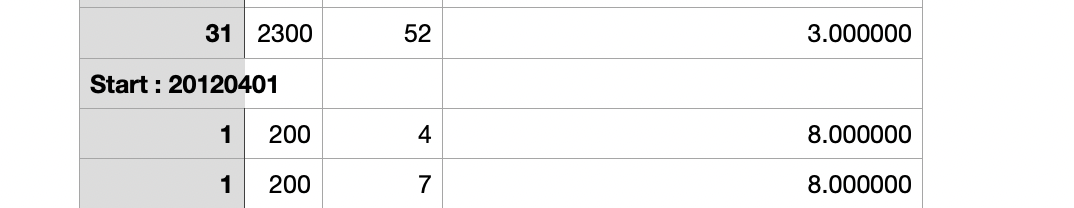
(정확히 확인 하지는 않았으나 'start' -> 'format'로 변경 되는 것과같이  년별로 표기가 상이한 부분이 있음)

일: 'format: day'

(년별로 datatype이 다르기 때문에 인덱싱 하는 것이 까다로움?)

3. 평균을 내기 위해서 data type을 numeric 하게 바꾸어야 한다.

월 정보를 담고있는 row 때문에 column들을 일괄적으로 변경이 불가능

-> 년월일을 지정한 후 '월 정보를 담고있는 row' drop

이외의 오류

2012년도는 11월과 12월 데이터가 누락 되어 있다.

2013년도 데이터는 중복 되어있다.(같은 데이터 1년치가 한번 더 들어가있음)

2015년도 데이터는 10일이 누락 되어 있다.

년도별로 data type 형태와 표기가 다른 년도가 있다.

(columns 내의 각 row마다 데이터 타입이 다를 수도 있다) 잘 기억은 안남 ㅎㅎ

column 이름 인덱싱 잘 안됨 특히  format: day (공백이나 뭔가 있는 듯)

등등?

1. 월년일 정보(201%-01-01 ~ 201%-12-31)를 가지고 있는 dataFrame 생성

2. 파일에 년월일 정보 입력

3. 'start' row drop

3.